In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
baseball_2016 = "Documents/baseball_reference_2016_exDome.csv"
stadium_capacity = "Documents/Stadium_Cap.csv"
baseball_df = pd.read_csv(baseball_2016)
stadium_df = pd.read_csv(stadium_capacity)
baseball_df.rename(columns={'home_team':'Team'}, inplace=True)

In [3]:
merge_table = pd.merge(baseball_df, stadium_df, on="Team")
Attendance = merge_table.iloc[:,1]
Capacity = merge_table.iloc[:,28]
merge_table['Attendance Percentage'] = Attendance / Capacity

merge_table.head()


,Unnamed: 0,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,date,field_type,game_type,Team,...,game_hours_dec,season,home_team_win,home_team_loss,home_team_outcome,Team_Code,Stadium,Capacity,City,Attendance Percentage
0,0.0,40030.0,New York Mets,1.0,7.0,3.0,4/3/2016,on grass,Night Game,Kansas City Royals,...,3.216667,regular season,1.0,0.0,Win,KCR,Kauffman Stadium,37903,"Kansas City, MO",1.056117
1,84.0,33132.0,Atlanta Braves,2.0,7.0,1.0,5/13/2016,on grass,Night Game,Kansas City Royals,...,2.750000,regular season,1.0,0.0,Win,KCR,Kauffman Stadium,37903,"Kansas City, MO",0.874126
2,143.0,33568.0,Detroit Tigers,0.0,13.0,10.0,6/16/2016,on grass,Night Game,Kansas City Royals,...,3.250000,regular season,0.0,1.0,Loss,KCR,Kauffman Stadium,37903,"Kansas City, MO",0.885629
3,154.0,33546.0,Cleveland Indians,3.0,5.0,4.0,6/15/2016,on grass,Night Game,Kansas City Royals,...,2.783333,regular season,1.0,0.0,Win,KCR,Kauffman Stadium,37903,"Kansas City, MO",0.885049
4,207.0,31144.0,Cleveland Indians,0.0,12.0,7.0,7/19/2016,on grass,Night Game,Kansas City Royals,...,2.766667,regular season,0.0,1.0,Loss,KCR,Kauffman Stadium,37903,"Kansas City, MO",0.821676


In [4]:
bins = [40, 45, 50,55,60,65,70,75,80,85, 90,95,100]
group_names = ["40-45", "45-50", "50-55", "55-60", "60-65", "65-70","70-75","75-80","80-85","85-90","90-95","95-100"]
merge_table["Temperature Range"] = pd.cut(merge_table["temperature"], bins, labels=group_names)
avg_attend = merge_table.groupby("Temperature Range")["Attendance Percentage"].mean()
avg_attend = pd.DataFrame(avg_attend).reset_index()

avg_attend

,Temperature Range,Attendance Percentage
0,40-45,0.701296
1,45-50,0.753593
2,50-55,0.633063
3,55-60,0.736146
4,60-65,0.710460
5,65-70,0.722139
6,70-75,0.734520
7,75-80,0.726201
8,80-85,0.732751
9,85-90,0.734750


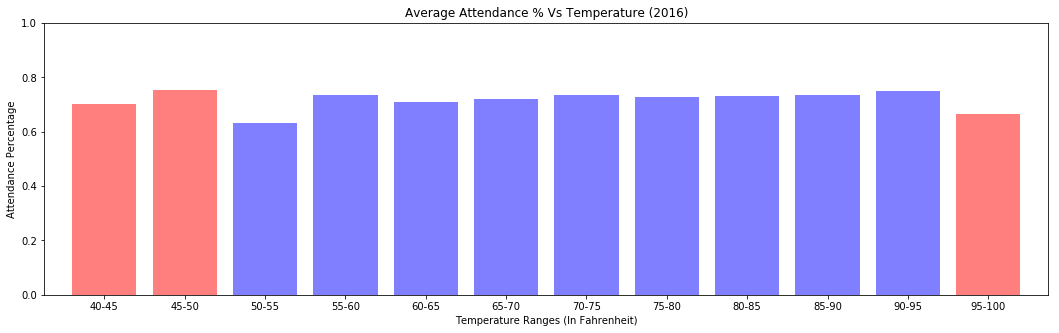

In [5]:
Attend_P = avg_attend.iloc[:,1]
x_axis = avg_attend.iloc[:,0]
plt.subplots(figsize=(18,5))
plt.bar(x_axis, Attend_P, color=['r','r','b','b','b','b','b','b','b','b','b','r'], alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["40-45", "45-50", "50-55", "55-60", "60-65", "65-70","70-75","75-80","80-85","85-90","90-95","95-100"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 1)
plt.title("Average Attendance % Vs Temperature (2016)")
plt.xlabel("Temperature Ranges (In Fahrenheit)")
plt.ylabel("Attendance Percentage")
plt.savefig("Pictures/AttendanceVTempBar.png")

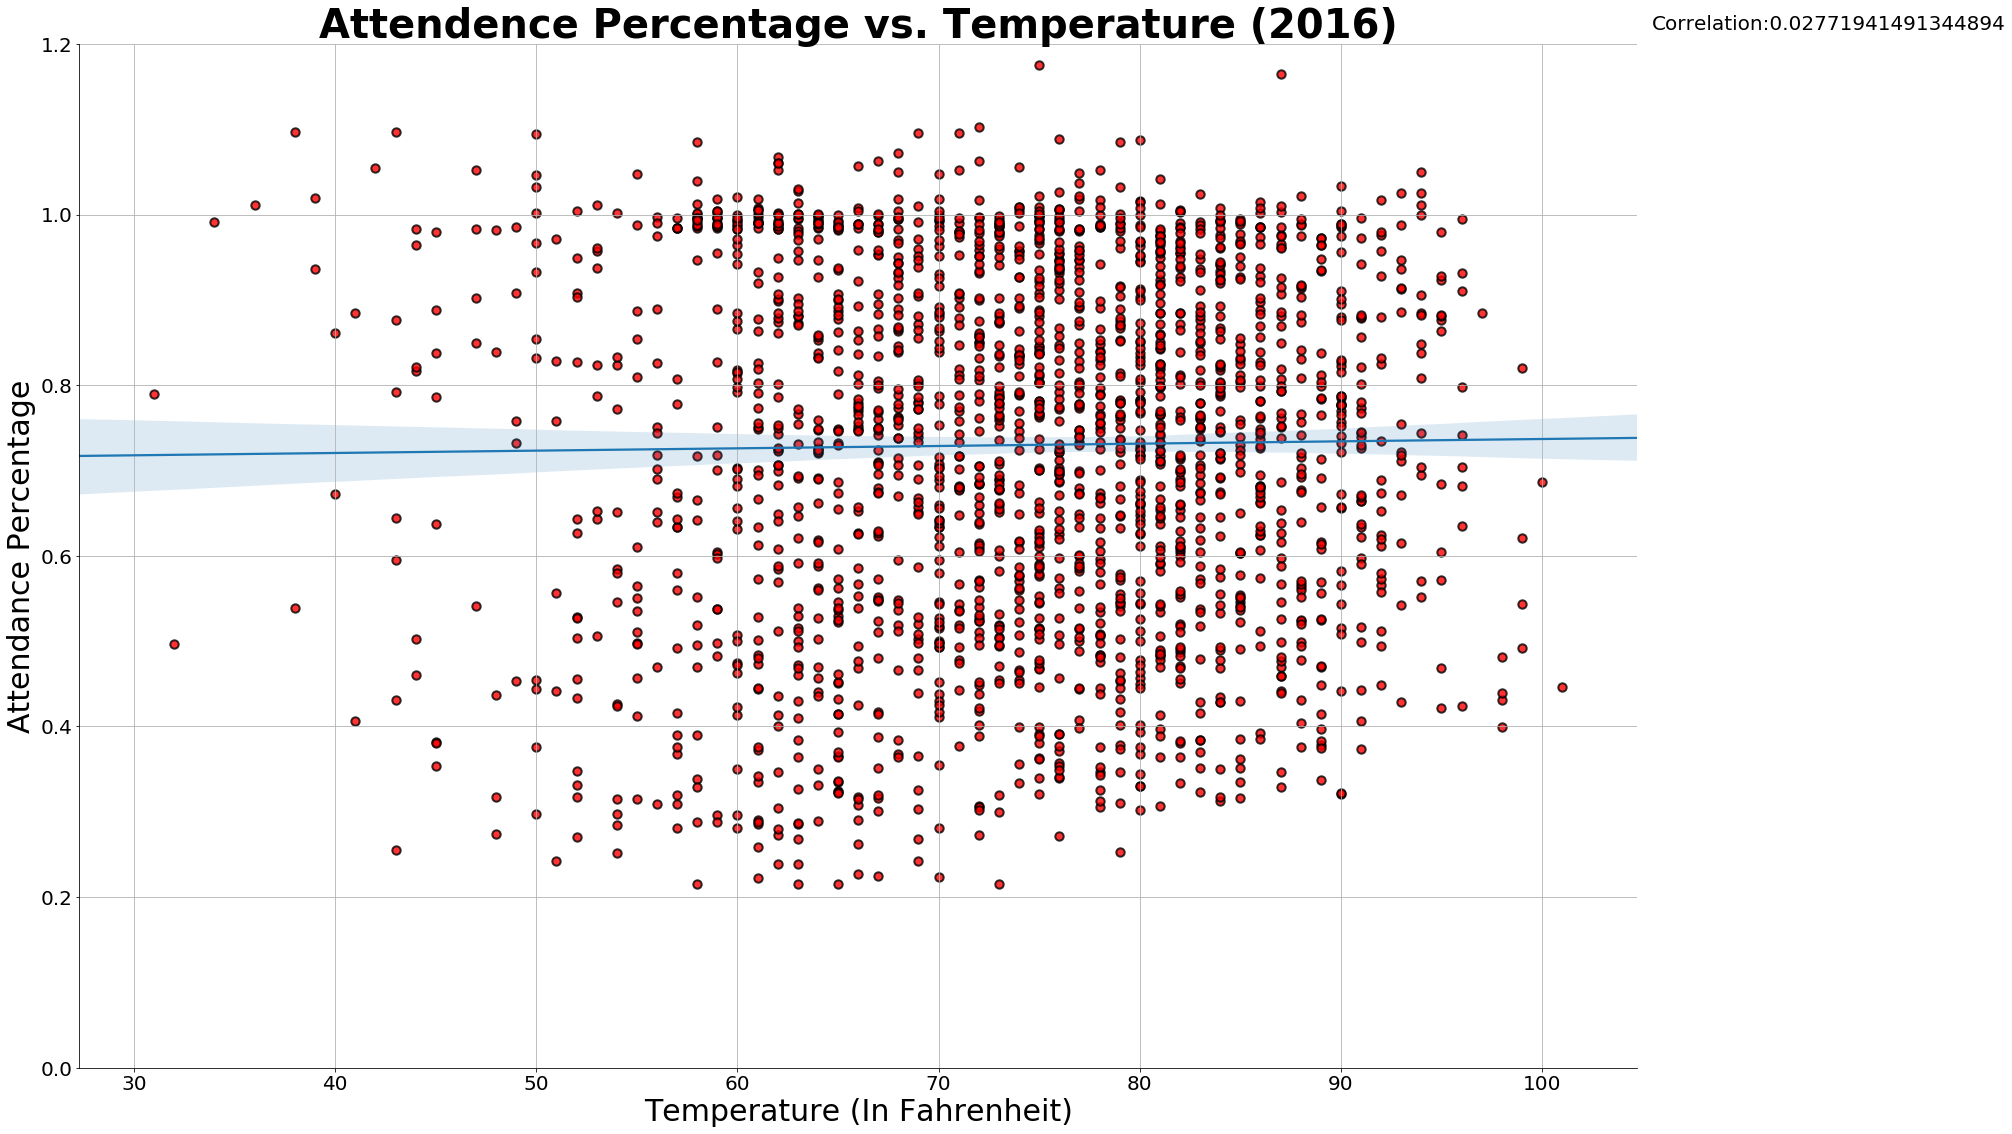

In [6]:
temperature = merge_table.iloc[:, 16]
Attendance_Percentage = merge_table.iloc[:, 30]
correlation = temperature.corr(Attendance_Percentage)


sns.lmplot(x='temperature',y='Attendance Percentage',data=merge_table,fit_reg=True, height=15,
                                      aspect=1.5,
                                      robust=True,
                                      palette="tab10",
                                      scatter_kws=dict(s=70, linewidth=2, edgecolors="black", color="Red"))

plt.xlabel("Temperature (In Fahrenheit)", fontsize = 30)
plt.ylabel("Attendance Percentage", fontsize = 30)
plt.title("Attendence Percentage vs. Temperature (2016)", fontsize = 40, fontweight="bold")
plt.figtext(1,1,(f"Correlation:{correlation}"), fontsize = 20)
plt.ylim(0,1.2)
plt.tick_params(labelsize=20)
plt.grid(True)
plt.savefig("Pictures/AttendanceVTempScatter.png")